In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
"""Test the message passing module."""

import rootutils
import torch

rootutils.setup_root("./", indicator=".project-root", pythonpath=True)
from topobenchmarkx.data.load.loaders import manual_simple_graph
from topobenchmarkx.transforms.liftings.graph2simplicial import (
    SimplicialCliqueLifting,
)


class TestSimplicialCliqueLifting:
    """Test the SimplicialCliqueLifting class."""

    def setup_method(self):
        # Load the graph
        self.data = manual_simple_graph()

        # Initialise the SimplicialCliqueLifting class
        self.lifting_signed = SimplicialCliqueLifting(complex_dim=3, signed=True)
        self.lifting_unsigned = SimplicialCliqueLifting(complex_dim=3, signed=False)

    def test_lift_topology(self):
        # Test the lift_topology method
        lifted_data_signed = self.lifting_signed.forward(self.data.clone())
        lifted_data_unsigned = self.lifting_unsigned.forward(self.data.clone())

        expected_incidence_1 = torch.tensor(
            [
                [-1.0, -1.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                [1.0, 0.0, 0.0, 0.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, -1.0, -1.0, -1.0, -1.0, 0.0, 0.0, 0.0],
                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0],
                [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, -1.0, -1.0],
                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0],
                [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
            ]
        )

        assert (
            abs(expected_incidence_1) == lifted_data_unsigned.incidence_1.to_dense()
        ).all(), "Something is wrong with unsigned incidence_1 (nodes to edges)."
        assert (
            expected_incidence_1 == lifted_data_signed.incidence_1.to_dense()
        ).all(), "Something is wrong with signed incidence_1 (nodes to edges)."

        expected_incidence_2 = torch.tensor(
            [
                [1.0, 1.0, 0.0, 0.0, 0.0, 0.0],
                [-1.0, 0.0, 1.0, 1.0, 0.0, 0.0],
                [0.0, -1.0, -1.0, 0.0, 0.0, 0.0],
                [0.0, 0.0, 0.0, -1.0, 0.0, 0.0],
                [1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
                [0.0, 1.0, 0.0, 0.0, -1.0, 0.0],
                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                [0.0, 0.0, 1.0, 0.0, 1.0, 0.0],
                [0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
                [0.0, 0.0, 0.0, 1.0, 0.0, -1.0],
                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                [0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
            ]
        )

        assert (
            abs(expected_incidence_2) == lifted_data_unsigned.incidence_2.to_dense()
        ).all(), "Something is wrong with unsigned incidence_2 (edges to triangles)."
        assert (
            expected_incidence_2 == lifted_data_signed.incidence_2.to_dense()
        ).all(), "Something is wrong with signed incidence_2 (edges to triangles)."

        expected_incidence_3 = torch.tensor(
            [[-1.0], [1.0], [-1.0], [0.0], [1.0], [0.0]]
        )

        assert (
            abs(expected_incidence_3) == lifted_data_unsigned.incidence_3.to_dense()
        ).all(), (
            "Something is wrong with unsigned incidence_3 (triangles to tetrahedrons)."
        )
        assert (
            expected_incidence_3 == lifted_data_signed.incidence_3.to_dense()
        ).all(), (
            "Something is wrong with signed incidence_3 (triangles to tetrahedrons)."
        )

    def test_lifted_features_signed(self):
        # Test the lift_features method for signed case
        lifted_data = self.lifting_signed.forward(self.data)

        expected_features_1 = torch.tensor(
            [
                [4],
                [9],
                [99],
                [4999],
                [5],
                [95],
                [40],
                [90],
                [490],
                [4990],
                [950],
                [500],
                [4500],
            ]
        )

        assert (
            expected_features_1 == lifted_data.x_1
        ).all(), "Something is wrong with x_1 features."

        expected_features_2 = torch.tensor([[0.0], [0.0], [0.0], [0.0], [0.0], [0.0]])

        assert (
            expected_features_2 == lifted_data.x_2
        ).all(), "Something is wrong with x_2 features."

        excepted_features_3 = torch.tensor([[0.0]])

        assert (
            excepted_features_3 == lifted_data.x_3
        ).all(), "Something is wrong with x_3 features."

    def test_lifted_features_unsigned(self):
        # Test the lift_features method for unsigned case
        lifted_data = self.lifting_unsigned.forward(self.data)

        expected_features_1 = torch.tensor(
            [
                [6.0],
                [11.0],
                [101.0],
                [5001.0],
                [15.0],
                [105.0],
                [60.0],
                [110.0],
                [510.0],
                [5010.0],
                [1050.0],
                [1500.0],
                [5500.0],
            ]
        )

        assert (
            expected_features_1 == lifted_data.x_1
        ).all(), "Something is wrong with x_1 features."

        expected_features_2 = torch.tensor(
            [[32.0], [212.0], [222.0], [10022.0], [230.0], [11020.0]]
        )

        assert (
            expected_features_2 == lifted_data.x_2
        ).all(), "Something is wrong with x_2 features."

        excepted_features_3 = torch.tensor([[696.0]])

        assert (
            excepted_features_3 == lifted_data.x_3
        ).all(), "Something is wrong with x_3 features."

In [3]:
test = TestSimplicialCliqueLifting()
test.setup_method()
test.test_lift_topology()
test.test_lifted_features_signed()
test.test_lifted_features_unsigned()

/home/lev/miniconda3/envs/topo/lib/python3.11/site-packages/scipy/sparse/_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [19]:
"""Test the message passing module."""

import rootutils

rootutils.setup_root("./", indicator=".project-root", pythonpath=True)
from topobenchmarkx.transforms.liftings.graph2simplicial import (
    SimplicialKHopLifting,
)


class TestSimplicialKHopLifting:
    """Test the SimplicialKHopLifting class."""

    def setup_method(self):
        # Load the graph
        self.data = manual_simple_graph()

        # Initialise the SimplicialKHopLifting class
        self.lifting_signed = SimplicialKHopLifting(complex_dim=4, signed=True)
        self.lifting_unsigned = SimplicialKHopLifting(
            complex_dim=4, signed=False
        )

    def test_lift_topology(self):
        # Test the lift_topology method
        lifted_data_signed = self.lifting_signed.forward(self.data.clone())
        lifted_data_unsigned = self.lifting_unsigned.forward(self.data.clone())
        expected_incidence_1 = torch.tensor(
            [
                [
                    -1.0,
                    -1.0,
                    -1.0,
                    -1.0,
                    -1.0,
                    -1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                ],
                [
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    -1.0,
                    -1.0,
                    -1.0,
                    -1.0,
                    -1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                ],
                [
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    -1.0,
                    -1.0,
                    -1.0,
                    -1.0,
                    -1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                ],
                [
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    -1.0,
                    -1.0,
                    -1.0,
                    -1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    -1.0,
                    -1.0,
                    0.0,
                    0.0,
                    0.0,
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    -1.0,
                    -1.0,
                    0.0,
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    -1.0,
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    1.0,
                    0.0,
                    1.0,
                    1.0,
                ],
            ]
        )

        assert (
            abs(expected_incidence_1) == lifted_data_unsigned.incidence_1.to_dense()
        ).all(), "Something is wrong with unsigned incidence_1 (nodes to edges)."
        assert (
            expected_incidence_1 == lifted_data_signed.incidence_1.to_dense()
        ).all(), "Something is wrong with signed incidence_1 (nodes to edges)."

        expected_incidence_2 = torch.tensor(
            [
                [
                    1.0,
                    1.0,
                    1.0,
                    1.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                ],
                [
                    -1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    1.0,
                    1.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                ],
                [
                    0.0,
                    -1.0,
                    0.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    1.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                ],
                [
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    0.0,
                    1.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    -1.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    -1.0,
                    -1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                ],
                [
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    1.0,
                    1.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                ],
                [
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    1.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                ],
                [
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    0.0,
                    1.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    -1.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    -1.0,
                    -1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    1.0,
                    1.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    1.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    -1.0,
                    0.0,
                    -1.0,
                    -1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    1.0,
                    1.0,
                    0.0,
                    0.0,
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    0.0,
                    0.0,
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                    -1.0,
                    0.0,
                    0.0,
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    -1.0,
                    0.0,
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    1.0,
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    1.0,
                    -1.0,
                ],
                [
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    0.0,
                    1.0,
                ],
            ]
        )

        assert (
            abs(expected_incidence_2) == lifted_data_unsigned.incidence_2.to_dense()
        ).all(), "Something is wrong with unsigned incidence_2 (edges to triangles)."
        assert (
            expected_incidence_2 == lifted_data_signed.incidence_2.to_dense()
        ).all(), "Something is wrong with signed incidence_2 (edges to triangles)."

    def test_lifted_features_signed(self):
        # Test the lift_features method for signed case
        lifted_data = self.lifting_signed.forward(self.data)

        expected_features_1 = torch.tensor(
            [
                [4.0000e00],
                [9.0000e00],
                [4.9000e01],
                [9.9000e01],
                [4.9900e02],
                [4.9990e03],
                [5.0000e00],
                [4.5000e01],
                [9.5000e01],
                [4.9500e02],
                [4.9950e03],
                [4.0000e01],
                [9.0000e01],
                [4.9000e02],
                [9.9000e02],
                [4.9900e03],
                [5.0000e01],
                [4.5000e02],
                [9.5000e02],
                [4.9500e03],
                [4.0000e02],
                [4.9000e03],
                [5.0000e02],
                [4.5000e03],
                [4.0000e03],
            ]
        )

        assert (
            expected_features_1 == lifted_data.x_1
        ).all(), "Something is wrong with x_1 features."

        expected_features_2 = torch.tensor(
            [
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
                [0.0],
            ]
        )

        assert (
            expected_features_2 == lifted_data.x_2
        ).all(), "Something is wrong with x_2 features."

    def test_lifted_features_unsigned(self):
        # Test the lift_features method for unsigned case
        lifted_data = self.lifting_unsigned.forward(self.data)

        expected_features_1 = torch.tensor(
            [
                [6.0],  # (0,1)
                [11.0],  # (0,2)
                [51.0],  # (0,3)
                [101.0],  # (0,4)
                [501.0],  # (0,5)
                [5001.0],  # (0,7)
                [15.0],  # (1,2)
                [55.0],  # (1,3)
                [105.0],  # ...
                [505.0],
                [5005.0],
                [60.0],
                [110.0],
                [510.0],
                [1010.0],
                [5010.0],
                [150.0],
                [550.0],
                [1050.0],
                [5050.0],
                [600.0],
                [5100.0],
                [1500.0],
                [5500.0],
                [6000.0],
            ]
        )

        assert (
            expected_features_1 == lifted_data.x_1
        ).all(), "Something is wrong with x_1 features."

        expected_features_2 = torch.tensor(
            [
                [32.0],  # (0,1,2)
                [112.0],  # (0,1,3)
                [212.0],  # ...
                [1012.0],
                [10012.0],
                [122.0],
                [222.0],
                [1022.0],
                [10022.0],
                [302.0],
                [1102.0],
                [10102.0],
                [1202.0],
                [10202.0],
                [11002.0],
                [130.0],
                [230.0],
                [1030.0],
                [10030.0],
                [310.0],
                [1110.0],
                [10110.0],
                [1210.0],
                [10210.0],
                [11010.0],
                [320.0],
                [1120.0],
                [2120.0],
                [10120.0],
                [1220.0],
                [10220.0],
                [3020.0],
                [11020.0],
                [12020.0],
                [1300.0],
                [10300.0],
                [3100.0],
                [11100.0],
                [11200.0],
                [13000.0],
            ]
        )

        assert (
            expected_features_2 == lifted_data.x_2
        ).all(), "Something is wrong with x_2 features."

In [20]:
test = TestSimplicialKHopLifting()
test.setup_method()
test.test_lift_topology()
test.test_lifted_features_signed()
test.test_lifted_features_unsigned()

/home/lev/miniconda3/envs/topo/lib/python3.11/site-packages/scipy/sparse/_index.py:145: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


In [21]:
data = test.lifting_signed(test.data)

In [23]:
data.incidence_4.to_dense().shape

torch.Size([36, 0])

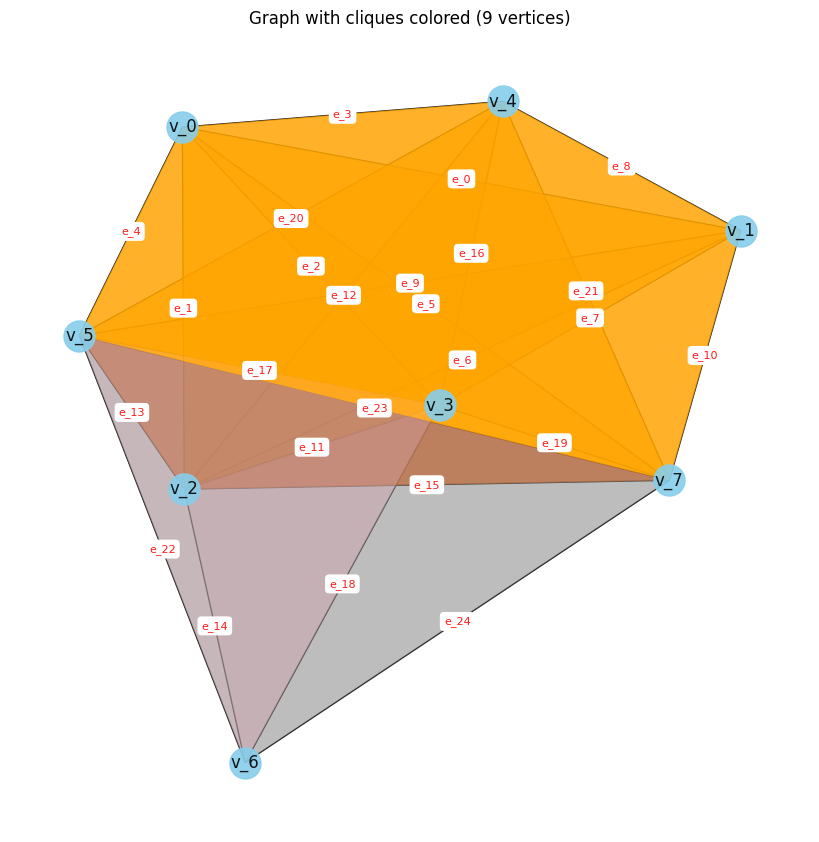

In [24]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from matplotlib.patches import Polygon

# Collect vertices
vertices = [i for i in range(data.x.shape[0])]

# Collect edges
edges = []
edge_mapper = {}
for edge_idx, edge in enumerate(abs(data.incidence_1.to_dense().T)):
    node_idxs = torch.where(edge != 0)[0].numpy()

    edges.append(torch.where(edge != 0)[0].numpy())
    edge_mapper[edge_idx] = sorted(node_idxs)


# Collect triangles
triangles = []
triangle_mapper = {}
for triangle_idx, triangle in enumerate(abs(data.incidence_2.to_dense().T)):
    edge_idxs = torch.where(triangle != 0)[0].numpy()

    nodes = []
    for edge_idx in edge_idxs:
        nodes += edge_mapper[edge_idx]

    triangle_mapper[triangle_idx] = {
        "edge_idxs": sorted(edge_idxs),
        "node_idxs": sorted(list(set(nodes))),
    }

    triangles.append(sorted(list(set(nodes))))

# Collect tetraherdons
tetrahedrons = []
tetrahedron_mapper = {}
for tetrahedron_idx, tetrahedron in enumerate(abs(data.incidence_3.to_dense().T)):
    triangle_idxs = torch.where(tetrahedron != 0)[0].numpy()

    nodes = []
    edges_in_tetrahedrons = []
    for triangle_idx in triangle_idxs:
        nodes += triangle_mapper[triangle_idx]["node_idxs"]
        edges_in_tetrahedrons += triangle_mapper[triangle_idx]["edge_idxs"]

    tetrahedron_mapper[tetrahedron_idx] = {
        "triangle_idxs": sorted(triangle_idxs),
        "edge_idxs": sorted(list(set(edges_in_tetrahedrons))),
        "node_idxs": sorted(list(set(nodes))),
    }

    tetrahedrons.append(sorted(list(set(nodes))))

edges = np.array(edges)
triangles = np.array(triangles)
tetrahedrons = np.array(tetrahedrons)

# Create a graph
G = nx.Graph()

# Add vertices
G.add_nodes_from(vertices)

# Add edges
G.add_edges_from(edges)

# Plot the graph with edge indices using other layout
pos = nx.spring_layout(G, seed=42)
# pos[3] = np.array([0.15539556, 0.25])

# Draw the graph with labels
nx.draw(
    G,
    pos,
    labels={i: f"v_{i}" for i in G.nodes()},
    node_size=500,
    node_color="skyblue",
    font_size=12,
    edge_color="black",
    width=1,
    linewidths=1,
    alpha=0.9,
)

# Color the faces (triangles) of the graph
face_color_map = {
    0: "pink",
    1: "gray",
    2: "blue",
    3: "blue",
    4: "orange",
    5: "purple",
    6: "red",
    7: "brown",
    8: "black",
    9: "gray",
}

for i, clique in enumerate(triangles):
    # Get the face color:
    # Calculate to how many tetrahedrons cique belongs
    # Then assign the color to the face
    counter = 0
    for tetrahedron in tetrahedrons:
        from itertools import combinations

        for comb in combinations(tetrahedron, 3):
            if set(clique) == set(comb):
                counter += 1

    polygon = [pos[v] for v in clique]
    poly = Polygon(
        polygon,
        closed=True,
        facecolor=face_color_map[counter],
        # edgecolor="pink",
        alpha=0.3,
    )
    plt.gca().add_patch(poly)


# Draw edges with different color and thickness
nx.draw_networkx_edge_labels(
    G,
    pos,
    edge_labels={
        tuple(corr_nodes): f"e_{edge_idx}"
        for edge_idx, corr_nodes in edge_mapper.items()
    },
    font_color="red",
    alpha=0.9,
    font_size=8,
    rotate=False,
    horizontalalignment="center",
    verticalalignment="center",
)


plt.title("Graph with cliques colored (9 vertices)")
plt.axis("off")
plt.show()

In [11]:
tetrahedron_mapper

{}